# Bayesian Regression Tutorial
https://brendanhasz.github.io/2018/12/03/tfp-regression

In [2]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed
tfd = tfp.distributions

In [10]:
# Settings
D = 4   #number of dimensions
N = 100 #number of datapoints to generate
noise_std_true = 1.0

# Generate data
b_true = np.random.randn(1).astype(np.float32)    #bias (alpha)
w_true = np.random.randn(D, 1).astype(np.float32) #weights (beta)
b_true = np.array(1.0).astype(np.float32) #np.random.randn(1).astype(np.float32)    #bias (alpha)
w_true = np.array([[3.0]]).astype(np.float32) #np.random.randn(D, 1).astype(np.float32) #weights (beta)
w_true = w_true[...,np.newaxis]
x = np.random.randn(N, D).astype(np.float32)
noise = noise_std_true * np.random.randn(N,1).astype(np.float32)
y = np.matmul(x, w_true) + b_true + noise

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4)

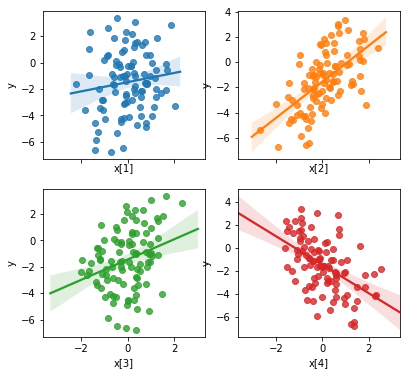

In [9]:
# Show data
import seaborn as sns
fig, axes = plt.subplots(int(np.ceil(D/2)), 2, sharex=True)
fig.set_size_inches(6.4, 6)
for i in range(D):
  t_ax = axes[int(i/2), i%2] #this axis
  sns.regplot(x[:,i], y[:,0], ax=t_ax)
  t_ax.set_ylabel('y')
  t_ax.set_xlabel('x[%d]'%(i+1))
plt.show()